##### This dataset is from https://www.kaggle.com/datasets/atharvasoundankar/shifting-seas-ocean-climate-and-marine-life-dataset 

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style("whitegrid")
file_path = "ocean_climate_dataset.csv" 
try:
    df = pd.read_csv(file_path, encoding='utf-8')  # Try UTF-8 encoding
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='ISO-8859-1')  # Fallback encoding

##### Display basic information about the dataset


In [ ]:
df.info(), df.head()

##### Clean and process the data

In [ ]:
# Check for missing values
print(df.isnull().sum())  

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Ensure column name consistency
df.rename(columns=lambda x: x.strip(), inplace=True)

# Parse 'Date' column properly
df['Date'] = pd.to_datetime(df['Date'])

# Check for missing values
missing_values = df.isnull().sum()

# Unique values in Bleaching Severity to check for weirdness
bleaching_unique = df['Bleaching Severity'].unique()

missing_values, bleaching_unique

# Clean 'Bleaching Severity' - replace 'None' with 'No Bleaching' for clarity
df['Bleaching Severity'] = df['Bleaching Severity'].replace('None', 'No Bleaching')

# Convert 'Location' and 'Bleaching Severity' to category dtype
df['Location'] = df['Location'].astype('category')
df['Bleaching Severity'] = df['Bleaching Severity'].astype('category')

# Quick preview to confirm changes
df.head()


### Chart 1: SST Trends Over Time

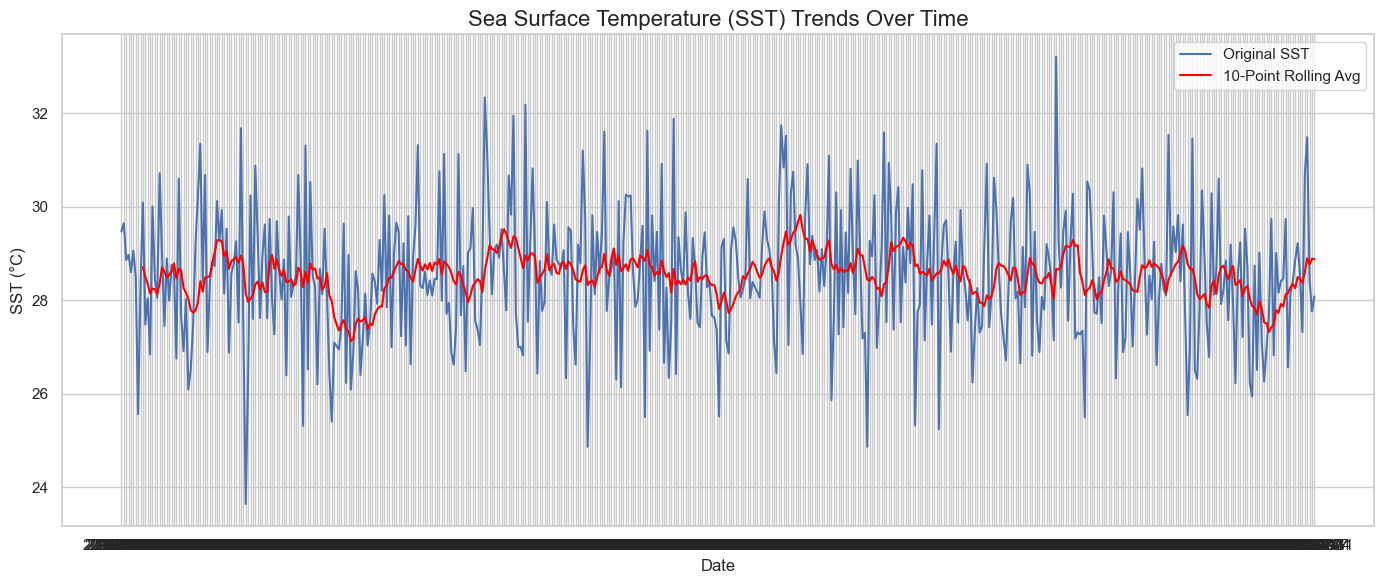

In [4]:
# Sort by date
df_sorted = df.sort_values('Date')

# Create rolling average to smooth out the SST trends
df_sorted['SST Rolling Avg'] = df_sorted['SST (°C)'].rolling(window=10).mean()

# Set Seaborn style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_sorted, x='Date', y='SST (°C)', label='Original SST', ci=None)
sns.lineplot(data=df_sorted, x='Date', y='SST Rolling Avg', color='red', label='10-Point Rolling Avg')

plt.title('Sea Surface Temperature (SST) Trends Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('SST (°C)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

### Chart 2: Locations with the Most Bleaching

C:\Users\FERRIOL\AppData\Local\Temp\ipykernel_27924\4268929361.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bleaching_counts.values, y=bleaching_counts.index, palette="flare")


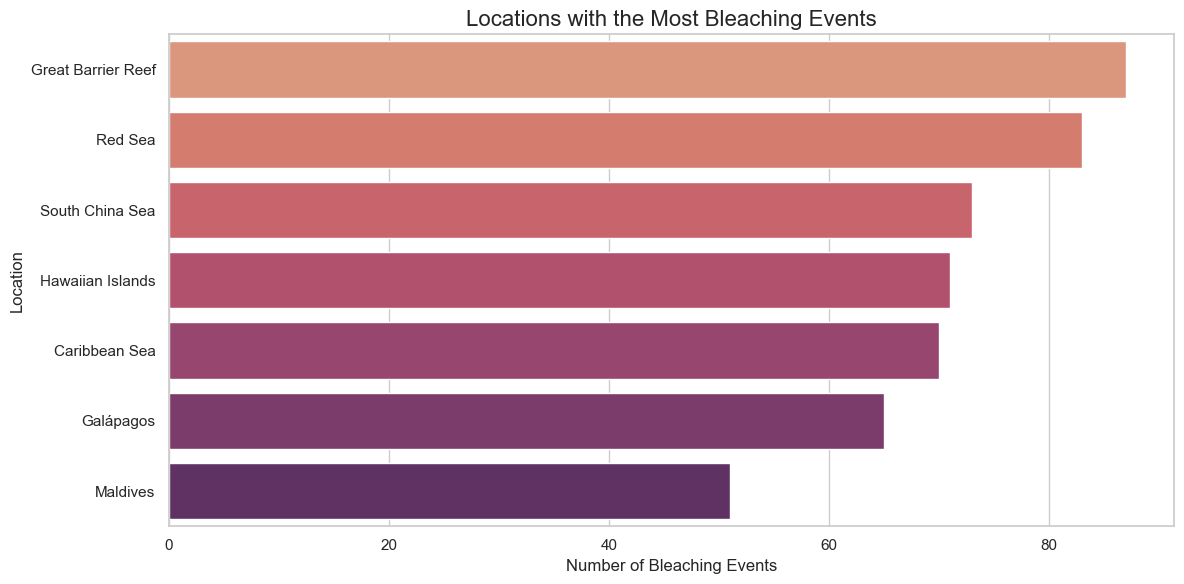

In [5]:
# Filter only bleaching events (exclude 'No Bleaching')
bleaching_df = df[df['Bleaching Severity'] != 'No Bleaching']

# Count bleaching events per location
bleaching_counts = bleaching_df['Location'].value_counts().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=bleaching_counts.values, y=bleaching_counts.index, palette="flare")

plt.title('Locations with the Most Bleaching Events', fontsize=16)
plt.xlabel('Number of Bleaching Events', fontsize=12)
plt.ylabel('Location', fontsize=12)
plt.tight_layout()
plt.show()

### Chart 3: Correlation between SST, pH, Bleaching, Marine Heatwave

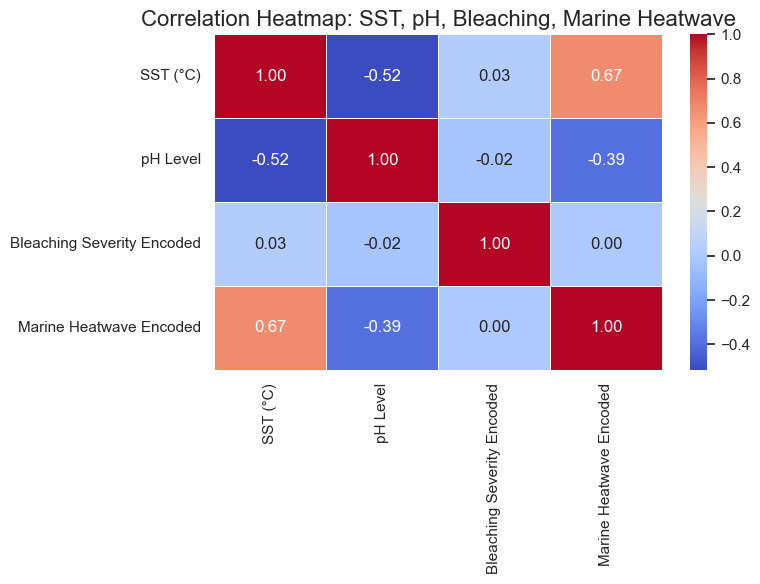

In [6]:
# Encode 'Bleaching Severity' into numbers
severity_mapping = {
    'No Bleaching': 0,
    'Low': 1,
    'Medium': 2,
    'High': 3
}
df['Bleaching Severity Encoded'] = df['Bleaching Severity'].map(severity_mapping)

# Encode 'Marine Heatwave' as 0 (False) or 1 (True) automatically
df['Marine Heatwave Encoded'] = df['Marine Heatwave'].astype(int)

# Select relevant columns
correlation_data = df[['SST (°C)', 'pH Level', 'Bleaching Severity Encoded', 'Marine Heatwave Encoded']]

# Compute correlation matrix
corr_matrix = correlation_data.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap: SST, pH, Bleaching, Marine Heatwave', fontsize=16)
plt.tight_layout()
plt.show()
